# EtherScan with Selenium

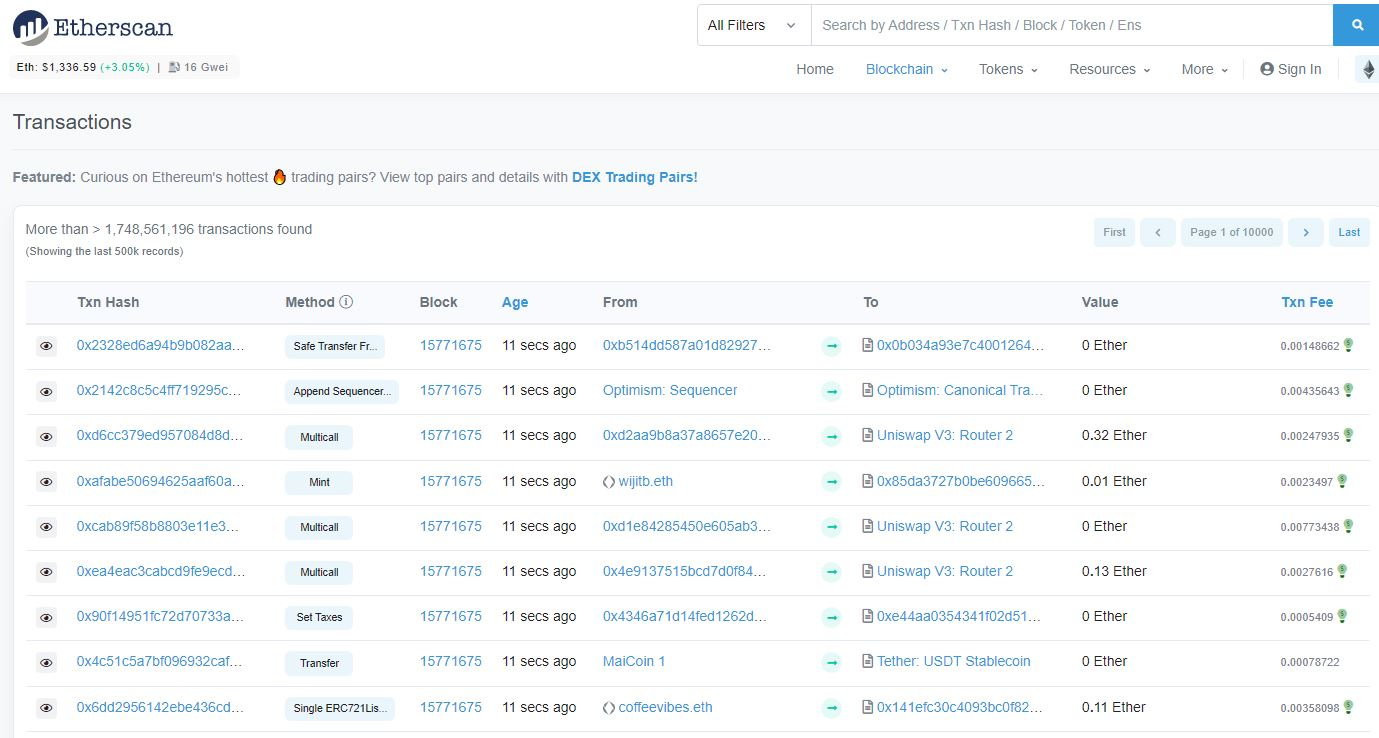

After checking out Etherscan(https://etherscan.io/txs), I designed my script to be focusing on 3 actions. 

1.Open up and browser using chrome(prep: chromedriver.exe has to be in the execution folder).

2.Go through each page by clicking the next page button on the bottom at the bottom of the page.

3.Go through each row on the page, and parse and clean the targeted data. 


### Setting up my script


In [1]:
from selenium.webdriver.common.keys import Keys
import random
from selenium import webdriver
import time
import csv


csvRows will be a list to store my final results.

In [2]:
csvRows=[]

This will open up and browser using chrome.

In [3]:
def setUp():
    global driver
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("window-size=1920,1080")
    driver = webdriver.Chrome(chrome_options=chrome_options)
    driver.get('https://etherscan.io/txs')
   

&emsp;
&emsp;
&emsp;
&emsp;

### Getting our Data

Variable “row” is each row on the table on the website. Here are the functions to parse Txn Hash, Block, Age, From, Value, and Txn Fee from our website. I added a little print statement for troubleshooting. These functions will take in the “row” as Selenium Element and spit out the targeted dated as a string. 

**The targeted data was chosen to show different methods of parsing (xPath,.text, .get_attribute, & text manipulation method such as indexing and .split)**


In [4]:
def getHash(row):
    ans = row.find_element_by_xpath('//span[@class="hash-tag text-truncate"]').text
    print('hash - '+str(ans))
    return ans
    
def getBlock(row):
    ans =row.find_element_by_xpath('//td[@class="d-none d-sm-table-cell"]').text
    print('block - '+str(ans))
    return ans

def getAge(row):
    ans =row.find_element_by_xpath('//span[@rel="tooltip"]').get_attribute('outerHTML').split('data-original-title="')[1].split('>')[0]
    print('age - '+str(ans))
    return ans

def getFrom(row):
    ans =str(row.get_attribute('outerHTML')).split('showAge')[1].split('rounded-circle')[0].split('" data-original-title="')[2].split('\n')[0]
    print('from - '+str(ans))
    return ans

def getValue(row):
    ans = row.text.split(' ')[-3] +' '+ row.text.split(' ')[-2]
    print('to - '+str(ans))
    return ans

def getTxn(row):
    ans =row.text.split(' ')[-1]
    print('txn fee - '+str(ans))
    return ans

&emsp;
&emsp;
&emsp;
&emsp;

### Saving our Data

This function will save the data into a CSV file. 

In [7]:
def save():
    file_name = 'etherScan.csv'

    with open(file_name, 'w', encoding='utf-8', newline='') as csvfile:
        writ=csv.writer(csvfile)
        title = ['Txn Hash', 'Block', 'Age','From','Value','Txn Fee']
        writ.writerow(title)
        for item in csvRows:
            writ.writerow(item)
    print("csv file saved")   

&emsp;
&emsp;
&emsp;
&emsp;

### Wrap it Up

Here I am just wrapping the functions up and organizing the script a little bit.


In [8]:
def getData(r):
    global csvRows
    csvRow=[]
    csvRow.append(getHash(r))
    csvRow.append(getBlock(r))
    csvRow.append(getAge(r))
    csvRow.append(getFrom(r))
    csvRow.append(getValue(r))
    csvRow.append(getTxn(r))
    csvRows.append(csvRow)

To get all the data in a table, we first defined the row element as "rows", then loop over each row in the table:

In [9]:
def allTraction():
    rows = driver.find_elements_by_xpath('//table[@class="table table-hover"]//tr')
    for r in rows[1:]:
        getData(r)
    

I also added a function to click on the next page button. This website is very fast from my testing, 3 seconds are more than enough to ensure all data are loaded. 

In [12]:
def nextPage():
    driver.find_element_by_xpath('//i[@class="fa fa-chevron-right small"]').click()
    time.sleep(3)

***When running on a larger scale, you can choose to wait for a specific element to load instead of ard code in a specific time.*** 


&emsp;
&emsp;
&emsp;
&emsp;

## Running the Script and Improvment

In [14]:
def main():
    setUp()
    for i in range(100): #100 pages
        allTraction()
        nextPage()
    save()


** When scaling, a few functions will be added to improve sustainability of the script. Functions that will ensure the page is not broken, and handle errors and logging.**

**Lastly, for showing purposes, the browser is NOT HEADLESS. In practice, headless will save additional computing power. **


Nonetheless, here are the results after scraping 100 pages of from Etherscan.io:

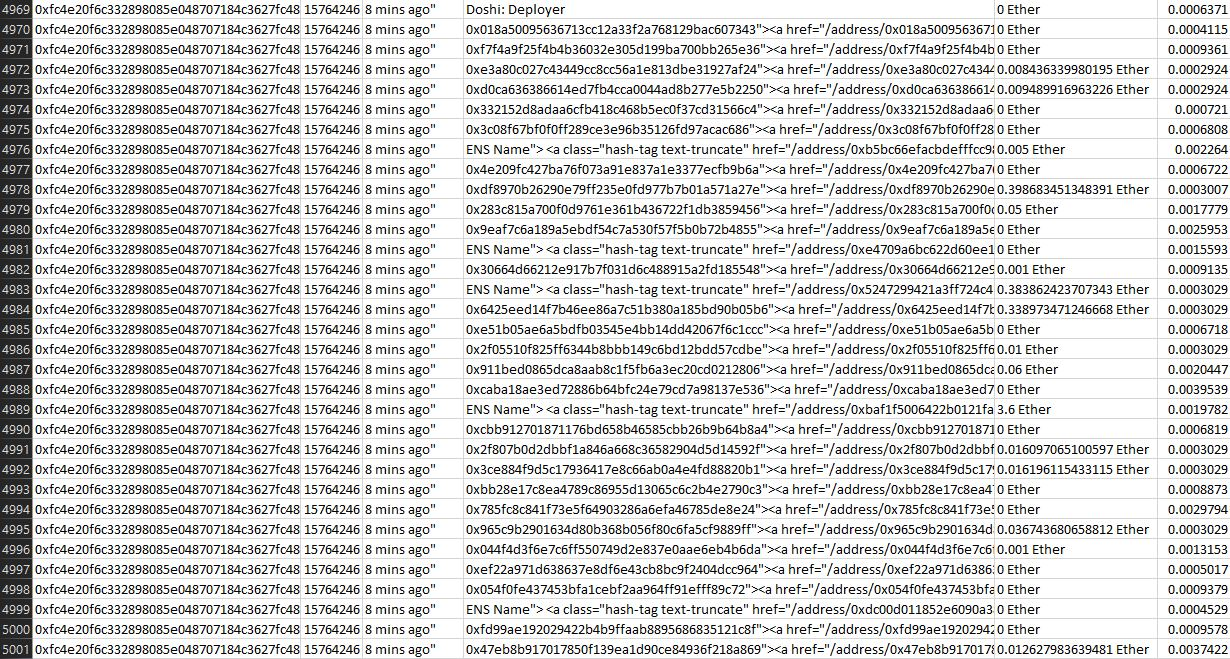

CSV file also comes with a header.

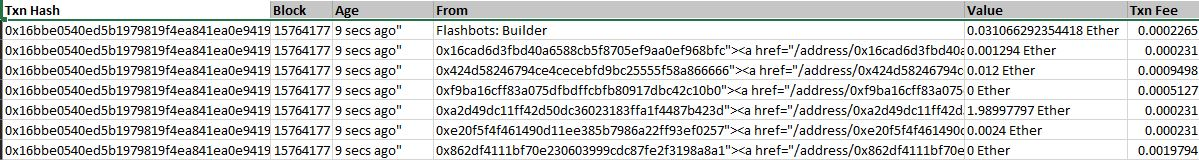

After 100 pages of data, we have infomation from the past 9 secs to the the past 8 min. 
Here is graph of the Txt Fee changes during the past 30 sec:

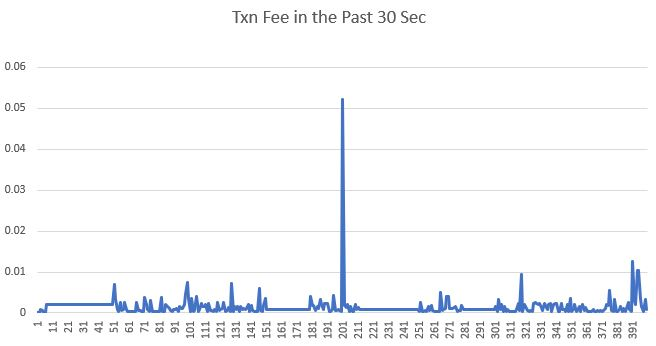